In [1]:
import os
from os import listdir
from os.path import isfile, join

import pandas as pd
from itertools import islice
import numpy as np

from skimage.external import tifffile
from skimage.external.tifffile import imread

import matplotlib.pyplot as plt

import ipywidgets as widgets

import random


from scipy.ndimage.morphology import binary_erosion as br
from skimage import morphology as skmor

from scipy import ndimage
from PIL import Image, ImageDraw

import numpy.ma as ma

from skimage.measure import label, regionprops

In [2]:
orgfile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\signals_org_v4.csv'
newfile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\new dataset\signals_new_v4.csv'
file=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\signals_combined_v2.csv'

In [3]:
orgdata=pd.read_csv(orgfile)
newdata=pd.read_csv(newfile)
data=pd.read_csv(file)

In [4]:
newdatasel=newdata.loc[((newdata.decon==True) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()
newdatand=newdata.loc[((newdata.decon==False) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [5]:
data.loc[(data['ab1 (heterochromatin)']=='HP1beta'),'ab1 (heterochromatin)']='HP1B'

In [6]:
datasel=data.loc[((data.decon==True) & (data['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [7]:
datand=data.loc[((data.decon==False) & (data['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [8]:
orgdatasel=orgdata.loc[((orgdata.decon==True) & (orgdata['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [9]:
orgdatand=orgdata.loc[((orgdata.decon==False) & (orgdata['ab1 (heterochromatin)']=='HP1B')),:].copy()

np.mean(newdatasel.inner_vol_het)/np.mean(newdatasel.inner_vol_total)

np.mean(newdatasel.inner_vol_eu)/np.mean(newdatasel.inner_vol_total)

np.mean(newdatasel.nuc_vol_eu)/np.mean(newdatasel.nuc_vol_total)

np.mean(newdatasel.nuc_vol_het)/np.mean(newdatasel.nuc_vol_total)

np.mean(newdatasel.inner_vol_het)+np.mean(newdatasel.inner_vol_eu)

np.mean(newdatasel.inner_vol_het)+np.mean(newdatasel.inner_vol_eu)

np.mean(newdata.inner_vol_het)+np.mean(newdata.inner_vol_eu)

(np.mean(newdata.inner_vol_het)+np.mean(newdata.inner_vol_eu))/np.mean(newdata.inner_vol_total)

newdata.loc[0,'path']

image=imread('Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\new dataset\\20191203_cell\\data_tiff\\20191203_cell-01.tif')

mask_het_total=imread('Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\new dataset\\20191203_cell\\segmentation_20\\20191203_cell-01_hetChrom.tif')

mask_het_inner=imread('Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\new dataset\\20191203_cell\\segmentation_20_erosion\\20191203_cell-01_hetChrom_inner.tif')

mask_het_outer=imread('Z:\\CookLab\\Liu\\20190816_organizedData_MCM_loading\\new dataset\\20191203_cell\\segmentation_20_erosion\\20191203_cell-01_hetChrom_outer.tif')

- changing mask type to binary
mask_het_total=mask_het_total.astype(bool)
mask_het_inner=mask_het_inner.astype(bool)
mask_het_outer=mask_het_outer.astype(bool)

np.sum(mask_het_total)

np.sum(mask_het_inner)

np.sum(mask_het_outer)

np.sum(mask_het_inner)+np.sum(mask_het_outer)

In [22]:
## testing to see if the calculated signals have results as expected
print(
'Orgdata #1:',(np.sum(orgdata['inner_vol_het']+orgdata['inner_vol_eu']))/np.sum(orgdata['inner_vol_total']),'\n'
'Orgdata #2:', (np.sum(orgdata['outer_vol_het']+orgdata['outer_vol_eu']))/np.sum(orgdata['outer_vol_total']),'\n'
'Newdata #1:', (np.mean(newdata['inner_vol_het'])+np.mean(newdata['inner_vol_eu']))/np.mean(newdata['inner_vol_total']),'\n'
'Newdata #2:', (np.sum(newdata['outer_vol_het']+newdata['outer_vol_eu']))/np.sum(newdata['outer_vol_total']))

Orgdata #1: 1.1739219419585125 
Orgdata #2: 0.941307211964949 
Newdata #1: 1.5629314093087205 
Newdata #2: 0.9019791257090303


In [20]:
print(
"#1: ",(np.sum(orgdata['inner_vol_total']+orgdata['outer_vol_total']))/np.sum(orgdata['nuc_vol_total']), '\n'
"#2: ", (np.sum(orgdata['nuc_vol_het']+orgdata['nuc_vol_eu']))/np.sum(orgdata['nuc_vol_total']), '\n'
"#3: ", (np.sum(orgdata['inner_vol_het']+orgdata['outer_vol_het']))/np.sum(orgdata['nuc_vol_het']), '\n'
"#4: ", (np.mean(orgdata['outer_vol_eu'])+np.mean(orgdata['inner_vol_eu']))/np.mean(orgdata['nuc_vol_eu']))

#1:  1.0 
#2:  1.0012796484496376 
#3:  1.0 
#4:  1.0


In [21]:
print(
"#1: ",(np.sum(newdata['inner_vol_total']+newdata['outer_vol_total']))/np.sum(newdata['nuc_vol_total']), '\n'
"#2: ", (np.sum(newdata['nuc_vol_het']+newdata['nuc_vol_eu']))/np.sum(newdata['nuc_vol_total']), '\n'
"#3: ", (np.sum(newdata['inner_vol_het']+newdata['outer_vol_het']))/np.sum(newdata['nuc_vol_het']), '\n'
"#4: ", (np.mean(newdata['outer_vol_eu'])+np.mean(newdata['inner_vol_eu']))/np.mean(newdata['nuc_vol_eu']))

#1:  1.0 
#2:  1.0001066068452185 
#3:  1.0 
#4:  1.0


In [13]:
## testing to see if the calculated signals have results as expected
print(
(np.sum(newdata['nuc_vol_het']+newdata['nuc_vol_eu']))/np.sum(newdata['nuc_vol_total']),
(np.mean(newdata['inner_vol_het'])+np.mean(newdata['inner_vol_eu']))/np.mean(newdata['inner_vol_total']),
(np.sum(newdata['outer_vol_het']+newdata['outer_vol_eu']))/np.sum(newdata['outer_vol_total']))

1.0001066068452185 1.5629314093087205 0.9019791257090303


In [14]:
print(
(np.sum(newdata['inner_vol_het']+newdata['outer_vol_het']))/np.sum(newdata['nuc_vol_het']),
(np.mean(newdata['outer_vol_eu'])+np.mean(newdata['inner_vol_eu']))/np.mean(newdata['nuc_vol_eu']),
(np.sum(newdata['nuc_vol_het'])+np.sum(newdata['nuc_vol_eu']))/np.sum(newdata['nuc_vol_total']),
(np.sum(newdata['inner_vol_total']+newdata['outer_vol_total'])/np.sum(newdata['nuc_vol_total'])))

1.0 1.0 1.0001066068452185 1.0


<IPython.core.display.Javascript object>


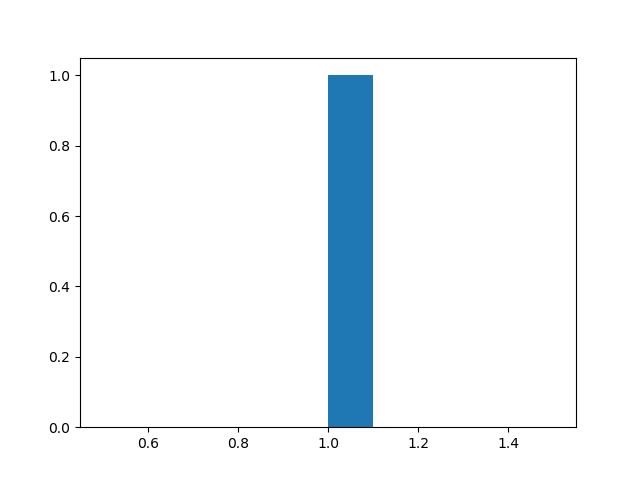

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

In [35]:
%matplotlib notebook
plt.hist((np.sum(orgdata['inner_vol_het']+orgdata['outer_vol_het']))/np.sum(orgdata['nuc_vol_het']),10)